In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
from PIL import Image
from api_keys import api_key
import gmaps
import gmaps.geojson_geometries

In [382]:
# Import CSV files containing data

city_data = pd.read_csv('City_zip.csv')
location_data = pd.read_csv('2018_Gaz_zcta_national copy.csv')
age_data = pd.read_csv('CSV Files/age_estimate_by_zip.csv')
ethnicity_data = pd.read_csv('CSV Files/ethnicity_by_zip.csv')
housing_data = pd.read_csv('CSV Files/housing_estimate_by_zip.csv')
job_data = pd.read_csv('CSV Files/job_estimate_by_zip.csv')
income_data = pd.read_csv('CSV Files/median_income_estimate_by_zip.csv')
business_data = pd.read_csv('CSV Files/sd_biz_zip.csv')
price_data = pd.read_csv('ZipCode_File/Zip_Zhvi_AllHomes.csv')

In [383]:
# Get user zip code information
user_zip = int(input('What zip code would you like to know about?: '))

What zip code would you like to know about?: 92121


In [384]:
# Opens image of zip code map boundaries
map_url = 'http://datasurfer.sandag.org/api/estimate/2014/zip/' + str(user_zip) + '/map'

with urllib.request.urlopen(map_url) as url:
    with open('temp.jpg', 'wb') as f:
        f.write(url.read())

img = Image.open('temp.jpg')

img.show()

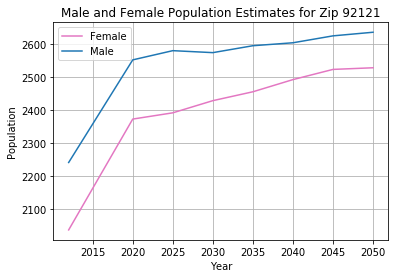

In [395]:
# Plot of gender populations for the zip code
zip_age_data = age_data.loc[age_data['zip']==user_zip]
zip_age_data = zip_age_data.loc[zip_age_data['group_10yr']=='Total Population']
female_pop_data = zip_age_data.loc[zip_age_data['sex']=='Female']
male_pop_data = zip_age_data.loc[zip_age_data['sex']=='Male']
female_pop_data


fig, ax = plt.subplots()

female_pop_data.plot(ax=ax, x='year', y='population', c='tab:pink', label='Female', 
                     title=f'Male and Female Population Estimates for Zip {user_zip}', grid=True)
male_pop_data.plot(ax=ax, x='year', y='population', c='tab:blue', label='Male', grid=True)

plt.xlabel('Year')
plt.ylabel('Population')

plt.savefig(f'{user_zip}_gender_plot.png')
plt.show()

In [396]:
# Working on adding ranks
age_data.head()
pop_rank = age_data[]

,Unnamed: 0,group_10yr,population,sex,year,zip
0,0,Under 10,1031,Male,2030,91901
1,1,10 to 19,1454,Male,2030,91901
2,2,20 to 29,929,Male,2030,91901
3,3,30 to 39,926,Male,2030,91901
4,4,40 to 49,1214,Male,2030,91901


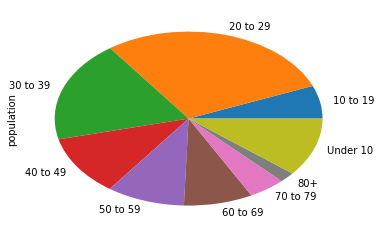

In [386]:
# Plot of age groups for the zip code
zip_age_data = age_data.loc[age_data['zip']==user_zip]
zip_age_data = zip_age_data[zip_age_data['group_10yr']!='Total Population']
age_group_data = zip_age_data[['group_10yr', 'population', 'sex', 'year', 'zip']].loc[zip_age_data['year']==2020]
age_group_data = age_group_data.groupby('group_10yr').sum().reset_index()
age_group_data.plot(kind='pie', y='population', labels=age_group_data['group_10yr'], legend=False)

Text(0,0.5,'Percent Change')

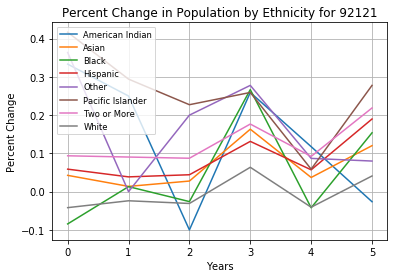

In [387]:
#Plot the change in ethnicity
ethnicity_change = ethnicity_data.loc[ethnicity_data['zip']==user_zip]
ethnicity_change = ethnicity_change[['ethnicity', 'pct_chg_2020_to_2025', 'pct_chg_2025_to_2030', 
                                     'pct_chg_2030_to_2035', 'pct_chg_2035_to_2040', 
                                     'pct_chg_2040_to_2045', 'pct_chg_2045_to_2050']]
ethnicity_change = ethnicity_change.rename(columns={'pct_chg_2020_to_2025':'2020 to 2025', 
                                                    'pct_chg_2025_to_2030':'2025 to 2030', 
                                                    'pct_chg_2030_to_2035':'2030 to 2035', 
                                                    'pct_chg_2035_to_2040':'2035 to 2040', 
                                                    'pct_chg_2040_to_2045':'2040 to 2045', 
                                                    'pct_chg_2045_to_2050':'2045 to 2050'})
ethnicity_change = ethnicity_change[ethnicity_change['ethnicity']!='Total Population']
ethnicity_change = ethnicity_change.pivot_table(columns='ethnicity').reset_index()

ax = ethnicity_change.plot(title=f'Percent Change in Population by Ethnicity for {user_zip}', grid=True, 
                      legend='reverse')
plt.legend(fontsize='small')
plt.xlabel('Years')
plt.ylabel('Percent Change')



Text(0,0.5,'Housing Units')

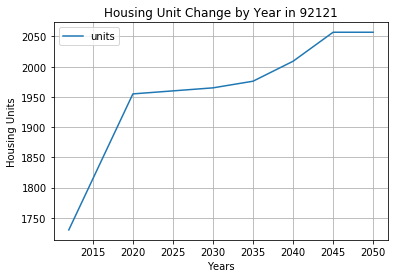

In [389]:
# Plot the change in housing units 
housing_units = housing_data.loc[housing_data['zip']==user_zip]
housing_units = housing_units[housing_units['unit_type']=='Total Units']
housing_units.plot(x='year', y='units', title=f'Housing Unit Change by Year in {user_zip}', grid=True)
plt.xlabel('Years')
plt.ylabel('Housing Units')




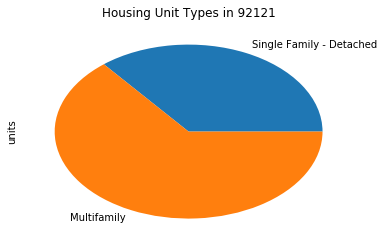

In [390]:
# Plot housing types for the zipcode
housing_types = housing_data.loc[housing_data['zip']==user_zip]
housing_types_2020 = housing_types[housing_types['unit_type']!='Total Units']
housing_types_2020 = housing_types_2020[housing_types_2020['year']==2020]
housing_types_2020.plot(kind='pie', y='units', labels=housing_types_2020['unit_type'], legend=False, 
                        title=f'Housing Unit Types in {user_zip}')

Text(0,0.5,'Jobs')

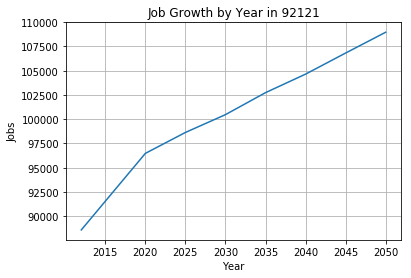

In [391]:
# Plotting job growth
job_growth = job_data[job_data['zip']==user_zip]
job_growth = job_growth[job_growth['category']=='Total Jobs']
job_growth.plot(x='year', y='jobs', grid=True, title=f'Job Growth by Year in {user_zip}', legend=False)
plt.xlabel('Year')
plt.ylabel('Jobs')

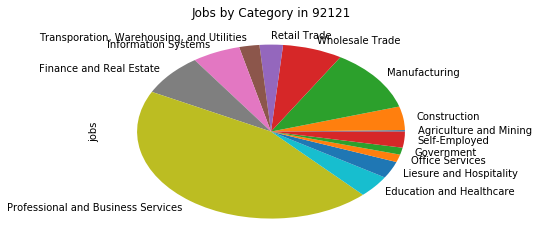

In [392]:
# Plot the types of jobs available
job_types = job_data[job_data['zip']==user_zip]
job_types = job_types[job_types['category']!='Total Jobs']
job_types = job_types[job_types['year']==2020]
job_types.plot(kind='pie', y='jobs', labels=job_types['category'], legend=False, 
               title=f'Jobs by Category in {user_zip}')

Text(0,0.5,'Median Home Price ($)')

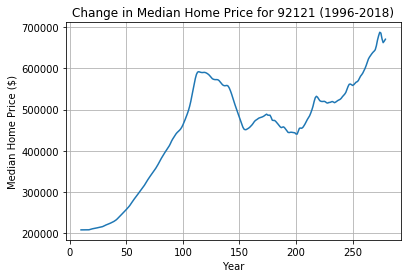

In [393]:
# Plot price change over time
price_data = price_data.rename(columns={'RegionName':'zip'})
income_price = pd.merge(income_data, price_data, on='zip', how='inner')
income_price = income_price.drop_duplicates(subset='zip')
median_price_change = income_price[income_price['zip']==user_zip]
median_price_change = median_price_change.transpose().reset_index()
median_price_change = median_price_change.drop([0,1,2,3,4,5,6,7,8,9])
median_price_change.plot(legend=False, grid=True, title=f'Change in Median Home Price for {user_zip} (1996-2018)')
plt.xlabel('Year')
plt.ylabel('Median Home Price ($)')

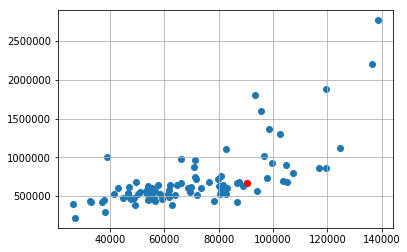

In [394]:
# Plot home price and income comparison
user_price = income_price.loc[income_price['zip']==user_zip]
user_price = user_price['2018-09']
user_inc = income_price.loc[income_price['zip']==user_zip]
user_inc = user_inc['median_inc']

plt.scatter(x=income_price['median_inc'], y=income_price['2018-09'])
plt.scatter(x=user_inc, y=user_price, c='red')
plt.grid()